In [64]:
# for this lab we use the breast cancer dataset
import numpy as np
import pandas as pd
import seaborn as sns
import helpers as hlp
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

# print(cancer.DESCR) # Print the data set description

In [65]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [66]:
cancer.feature_names
# cancer.target

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [67]:
# You should write your whole answer within the function provided. The autograder will call
# this function and compare the return value against the correct solution value
def answer_zero():
    
    # This function returns the number of features of the breast cancer dataset, which is an integer. 
    # The assignment question description will tell you the general format the autograder is expecting
    return len(cancer['feature_names'])

# You can examine what your function returns by calling it in the cell. If you have questions
# about the assignment formats, check out the discussion forums for any FAQs
answer_zero() 

30

In [68]:
def answer_one():
    
    # creating a DataFrame from the dataset
    df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

    # adding the target to the DataFrame (31st column)
    df['target'] = cancer.target

    # returning the newly created DataFrame
    return df    # Return your answer


cancerdf = answer_one()

# # checking the results of 1st task of Question 1
# print(cancerdf.shape)

# # checking the results of 2nd task of Question 1
# cancerdf.index

# # checking the results of 3rd task of Question 1
# cancerdf.columns

In [69]:
def answer_two():
    cancerdf = answer_one()
    malignant_count = (cancerdf['target'] == 0).sum()
    # print(type(malignant_count))
    benign_count = (cancerdf['target'] == 1).sum()
    target = pd.Series([malignant_count, benign_count], index=['malignant', 'benign'])
    return target    # Return your answer

answer_two()

malignant    212
benign       357
dtype: int64

In [70]:
def answer_three():
    cancerdf = answer_one()
    # X = cancer['data'] # This is also giving the right results at the end but it is returning a numpy array
    
    # return all rows and all column except the last one (target -> -1 indicates that (exclusive))
    X = cancerdf.iloc[:, :-1]

    # method 1
    y = cancerdf['target']

    # method 2
    # y = cancerdf.iloc[:, -1]

    # print("X: ", X.shape, type(X))
    # print("y: ", y.shape, type(y))
    return X, y


answer_three()


(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  mean conca

In [71]:
from sklearn.model_selection import train_test_split

def answer_four():
    X, y = answer_three()
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    # print("X_train: ", X_train.shape)
    # print("X_test: ", X_test.shape)
    # print("y_train: ", y_train.shape)
    # print("y_test: ", y_test.shape)
    return X_train, X_test, y_train, y_test
    
type(answer_four())

tuple

In [72]:
from sklearn.neighbors import KNeighborsClassifier

def answer_five():
    X_train, X_test, y_train, y_test = answer_four()

    # Your code here
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)

    # Return your answer
    return knn

answer_five()

KNeighborsClassifier(n_neighbors=1)

In [73]:
def answer_six():
    cancerdf = answer_one()
    means = cancerdf.mean()[:-1].values.reshape(1, -1)
    # print(means)
    knn = answer_five()
        
    return knn.predict(means)

answer_six()

c:\Users\AK47\anaconda3\envs\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [74]:
def answer_seven():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    
    # Your code here
    return knn.predict(X_test) # Return your answer

answer_seven()

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [75]:
def answer_eight():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    
    # Your code here
    mean_score = knn.score(X_test, y_test)
    
    return mean_score # Return your answer

answer_eight()

0.916083916083916

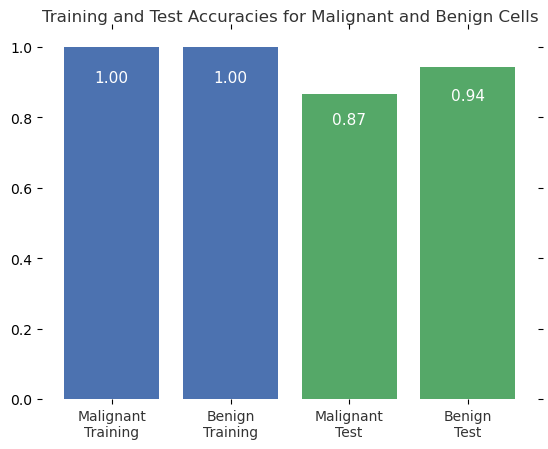

In [76]:
def accuracy_plot():
    import matplotlib.pyplot as plt


    X_train, X_test, y_train, y_test = answer_four()

    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]

    knn = answer_five()

    scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y), 
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]


    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8)
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

accuracy_plot()